In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv("../../data/processed/Roommate_Compatibility_Survey.csv")
df.head()

,Gender,Age,Faculty,Religion,Parents_Abroad,Living_with_Parents,Do_you_smoke,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Ideal_Study_Environment_Description,...,Being loud when I’m studying/sleeping,Eating my food,Not picking up after themselves,Being unfriendly,Lack of respect for me and my privacy,Not being open-minded,Bad personal hygiene,Using my things without asking,Having guests over too much,Messy
0,1,21,2,1,0,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,19,2,1,1,0,0,2,0,1,...,0,0,1,0,1,0,1,1,0,0
2,0,21,2,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,0,20,2,1,0,1,0,2,1,1,...,0,0,1,1,1,0,0,0,0,0
4,0,19,2,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [36]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


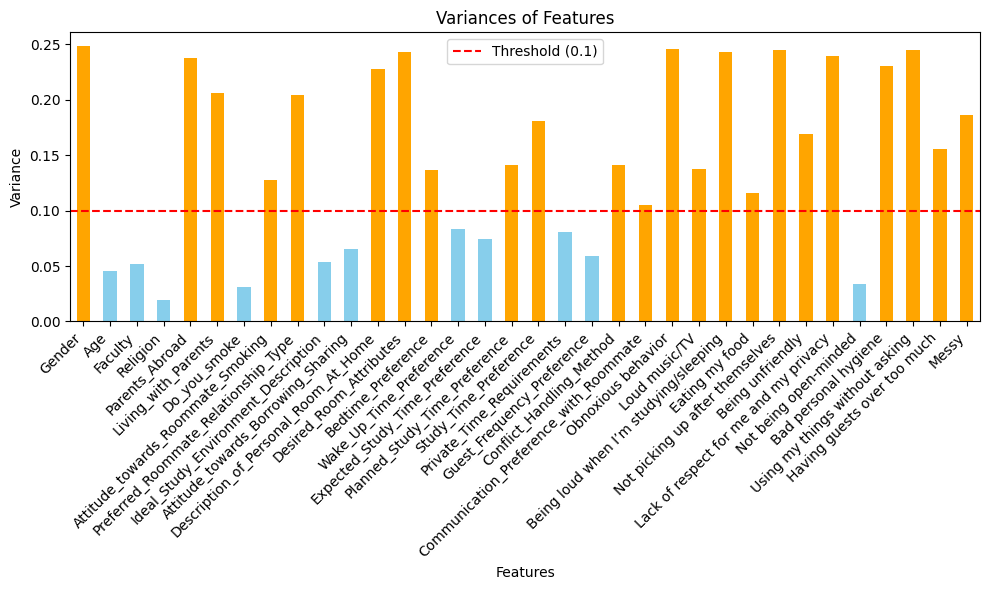

In [52]:
import matplotlib.pyplot as plt

# Define the threshold
threshold = 0.10 # Adjust the threshold as needed

# Calculate variances of the features
variances = data_normalized.var()

# Plot the variances
plt.figure(figsize=(10, 6))
variances.plot(kind='bar', color=['skyblue' if var < threshold else 'orange' for var in variances])
plt.title('Variances of Features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# Define the threshold
threshold = 0.10

variances = data_normalized.var()

low_threshold_columns = variances[variances < threshold]
high_threshold_columns = variances[variances >= threshold]

print("Columns with variances below the threshold (<", threshold, "):")
print(low_threshold_columns)

print("\nColumns with variances equal to or above the threshold (>= ", threshold, "):")
print(high_threshold_columns)


Columns with variances below the threshold (< 0.1 ):
Age                                    0.045387
Faculty                                0.052077
Religion                               0.019225
Do_you_smoke                           0.030970
Ideal_Study_Environment_Description    0.054029
Attitude_towards_Borrowing_Sharing     0.065591
Wake_Up_Time_Preference                0.083088
Expected_Study_Time_Preference         0.074782
Private_Time_Requirements              0.080572
Guest_Frequency_Preference             0.059190
Not being open-minded                  0.034053
dtype: float64

Columns with variances equal to or above the threshold (>=  0.1 ):
Gender                                    0.248392
Parents_Abroad                            0.238097
Living_with_Parents                       0.206311
Attitude_towards_Roommate_Smoking         0.127206
Preferred_Roommate_Relationship_Type      0.204642
Description_of_Personal_Room_At_Home      0.227899
Desired_Room_Attributes       

In [58]:
filtered_df = data_normalized[high_threshold_columns.index]
filtered_df.head()

,Gender,Parents_Abroad,Living_with_Parents,Attitude_towards_Roommate_Smoking,Preferred_Roommate_Relationship_Type,Description_of_Personal_Room_At_Home,Desired_Room_Attributes,Bedtime_Preference,Planned_Study_Time_Preference,Study_Time_Preference,...,Loud music/TV,Being loud when I’m studying/sleeping,Eating my food,Not picking up after themselves,Being unfriendly,Lack of respect for me and my privacy,Bad personal hygiene,Using my things without asking,Having guests over too much,Messy
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.333333,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.666667,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.666667,1.000000,0.5,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.666667,1.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [59]:
filtered_df.columns


Index(['Gender', 'Parents_Abroad', 'Living_with_Parents',
       'Attitude_towards_Roommate_Smoking',
       'Preferred_Roommate_Relationship_Type',
       'Description_of_Personal_Room_At_Home', 'Desired_Room_Attributes',
       'Bedtime_Preference', 'Planned_Study_Time_Preference',
       'Study_Time_Preference', 'Conflict_Handling_Method',
       'Communication_Preference_with_Roommate', 'Obnoxious behavior',
       'Loud music/TV', 'Being loud when I’m studying/sleeping',
       'Eating my food', 'Not picking up after themselves', 'Being unfriendly',
       'Lack of respect for me and my privacy', 'Bad personal hygiene',
       'Using my things without asking', 'Having guests over too much',
       'Messy'],
      dtype='object')

In [60]:
filtered_df.to_csv('../../data/final/Roommate_Compatibility_Survey.csv', index=False)